In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [7]:
iris=load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
irisdf['target']=iris.target
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
target1 = irisdf[irisdf.target==0]
target2 = irisdf[irisdf.target==1]
target3 = irisdf[irisdf.target==2]

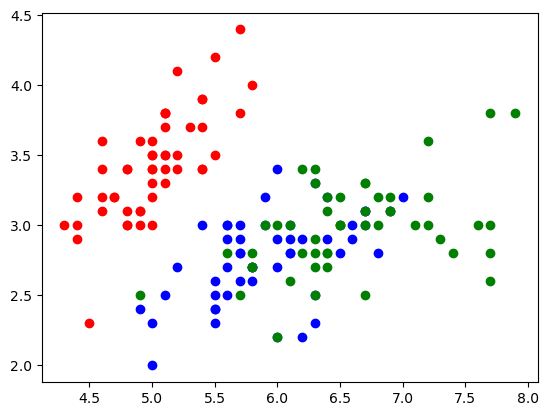

In [11]:
plt.scatter(target1["sepal length (cm)"], target1["sepal width (cm)"], color='red')
plt.scatter(target2["sepal length (cm)"], target2["sepal width (cm)"], color='blue')
plt.scatter(target3["sepal length (cm)"], target3["sepal width (cm)"], color='green')

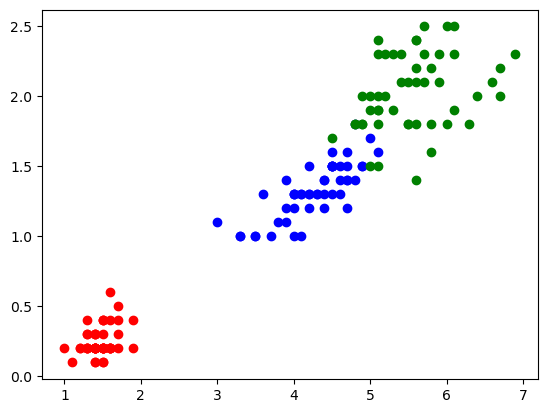

In [12]:
plt.scatter(target1["petal length (cm)"], target1["petal width (cm)"], color='red')
plt.scatter(target2["petal length (cm)"], target2["petal width (cm)"], color='blue')
plt.scatter(target3["petal length (cm)"], target3["petal width (cm)"], color='green')

In [13]:
X = irisdf.drop(columns='target')
y = irisdf.target

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2,
       1, 2, 1, 2, 2, 0, 0, 0])

In [19]:
accuracy_score(y_test,y_pred)

0.9

In [20]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  1,  9]], dtype=int64)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [28]:
new_data_point = [[5,3 ,5, 1]]
new_data_point = scaler.transform(new_data_point)
pred_class = knn.predict(new_data_point)
class_name = iris.target_names[pred_class]
class_name

C:\Users\darsh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype='<U10')